In [41]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import odeint

In [42]:
## definamos el sistema dado en el enunciado teniendo como guia la definicion de los ejemplos de clase

def System(r,t):
    x=r[0]
    y=r[1]
    dx=2*x - y
    dy=x + 2*y
    
    return [dx,dy]

In [43]:
## codigo del integrador de adams tomado del codigo de clase
def IntegratorAdams(f,r0,t):
    
    h = t[1] - t[0]
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    x[0] = r0[0]
    y[0] = r0[1]
    K11 = np.zeros(2)
    K12 = np.zeros(2)
    present = np.array([x[0],y[0]])
    K11 = f(present,t[0])
    
    # Euler
    x[1] = x[0] + h*K11[0]
    y[1] = y[0] + h*K11[1]
    xc = x.copy()
    yc = y.copy()
    for i in range(2,len(t)):
        present = np.array([x[i-1],y[i-1]])
        past = np.array([x[i-2],y[i-2]])
        K11 = f(present,t[i-1])
        K12 = f(past,t[i-2])
        x[i] = x[i-1] + 0.5*h*(3*K11[0]-K12[0])
        y[i] = y[i-1] + 0.5*h*(3*K11[1]-K12[1])
        xc[i] = x[i]
        yc[i] = y[i]
        # Futuro
        futuro = np.array([x[i],y[i]])
        K13 = f(futuro,t[i])
        xc[i] = xc[i-1] + h*(5*K13[0]+8*K11[0]-K12[0])/12
        yc[i] = yc[i-1] + h*(5*K13[1]+8*K11[1]-K12[1])/12
    
    return xc,yc

In [44]:
t = np.linspace(0,np.pi,1000)

In [45]:
# definamos los pasos y r0
h = t[1] - t[0]
r0 = [0+h,0]

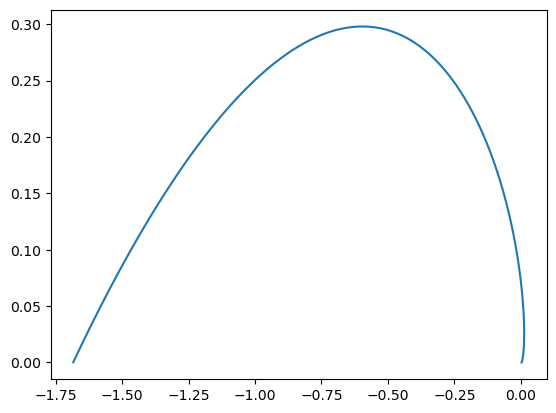

In [46]:
sol = IntegratorAdams(System,r0,t)
solExact = odeint(System,r0,t)

plt.plot(sol[0],sol[1])

In [47]:
#veamos ahora que el resultado de la matriz nos arroja unos componentes 

Matriz =np.array([[2,-1],[1,2]])
# podemos utilizar np.lnal de la matriz 
Valores,vectores=np.linalg.eig(Matriz)

In [48]:
#vemaos los valores y vectores propios pedidos en el punto c donde se toma Matriz encontrada al final del pdf 
Valores
vectores

array([[0.70710678+0.j        , 0.70710678-0.j        ],
       [0.        -0.70710678j, 0.        +0.70710678j]])

In [49]:
Valores

array([2.+1.j, 2.-1.j])

Text(0.5, 1.0, 'Trayectorias en el espacio de fase. Podemos ver que el punto crítico es (0,0)')

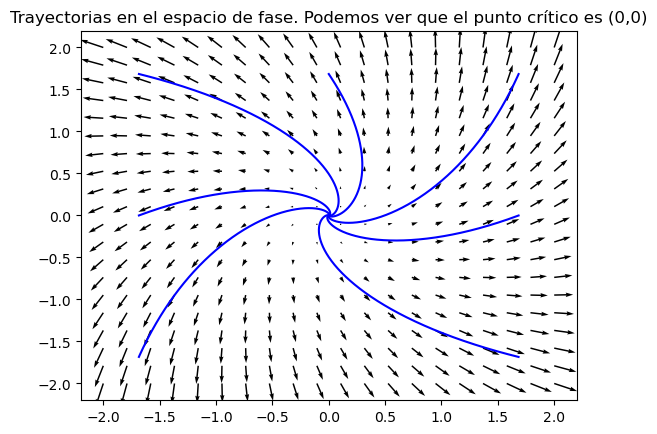

In [50]:
fig=plt.figure()
ax=fig.add_subplot()

r=[(0+h,0),(0-h,0),(0+h,0+h),(0,0-h),(0-h,0-h),(0+h,0-h),(0-h,0+h)]
for i in r:  
    sol_ = IntegratorAdams(System,i,t)
    ax.plot(sol_[0],sol_[1],c="b")
#La función meshgrid transforma el dominio especificado por dos vectores x e y en matrices X e Y 
x_,y_ = np.meshgrid(np.linspace(-2,2,20),np.linspace(-2,2,20))    
ax.quiver(x_,y_,System([x_,y_],t)[0],System([x_,y_],t)[1])
ax.set_title(label="Trayectorias en el espacio de fase. Podemos ver que el punto crítico es (0,0)")

#notemos que esta conclusion es lo mismo a lo que se llego en el pdf subido aquí mismo
